# Extract from xarray dataset

Install https://pypi.org/project/ipython-autotime/ or outcomment %load_ext autotime

In [1]:
%load_ext autotime
import numpy as np
import xarray as xr
from fmskill import PointObservation, TrackObservation
import matplotlib.pyplot as plt

time: 7.61 s (started: 2021-06-08 15:16:40 +02:00)


## Observations


In [2]:
o1 = PointObservation('../tests/testdata/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")
o3 = TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=3, name="c2")

time: 500 ms (started: 2021-06-08 15:16:48 +02:00)


## Xarray north sea model result

ERA5 north sea subset

In [3]:
ds = xr.open_dataset(r"..\tests\testdata\SW\ERA5_DutchCoast.nc")

time: 15 ms (started: 2021-06-08 15:16:48 +02:00)


### Plot observation positions

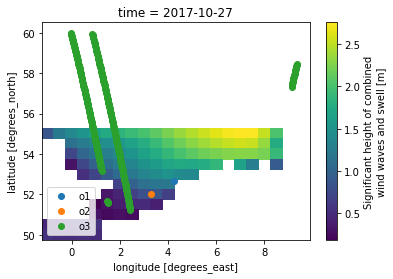

time: 1.31 s (started: 2021-06-08 15:16:48 +02:00)


In [4]:
ds.isel(time=0)['swh'].plot()
plt.scatter(o1.x, o1.y, label='o1')
plt.scatter(o2.x, o2.y, label='o2')
plt.scatter(o3.df.Longitude, o3.df.Latitude, label='o3') # ToDo: also convention for x, y for TrackObservation?
plt.autoscale()
plt.legend()

ToDo: Showing firts time here. Better could be to show an empty grid only, for stats are expensive and questionable (time ref of which observation for example)

### Extract PointObservation o1

All nearest

In [5]:
da = ds['swh'].interp(coords=dict(time=o1.df.index, longitude=o1.x, latitude=o1.y), method="nearest")
mr1 = da.to_dataframe()

time: 16 ms (started: 2021-06-08 15:16:49 +02:00)


Linear time, nearest spatial

In [6]:
da = ds['swh'].interp(time=o1.df.index, method="linear")
da = da.interp(coords=dict(longitude=o1.x, latitude=o1.y), method="nearest")
mr2 = da.to_dataframe()

time: 32 ms (started: 2021-06-08 15:16:49 +02:00)


All linear

In [7]:
da = ds['swh'].interp(coords=dict(time=o1.df.index, longitude=o1.x, latitude=o1.y), method="linear")
mr3 = da.to_dataframe()
mr3.count()

longitude    564
latitude     564
swh            0
dtype: int64

time: 31 ms (started: 2021-06-08 15:16:50 +02:00)


ToDo:
- Spatial linear interpolation for o1 not possible as outside domain
- Check max distance to domain for nearest?

Time series comparison o1

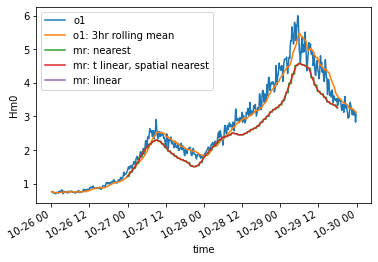

time: 1.23 s (started: 2021-06-08 15:16:50 +02:00)


In [8]:
plt.figure()
ax = plt.gca()
o1.df['Hm0'].plot(ax=ax, label='o1')
o1.df['Hm0'].rolling('3H').mean().plot(ax=ax, label='o1: 3hr rolling mean') # phase shift not fixed
mr1['swh'].plot(ax=ax, label='mr: nearest')
mr2['swh'].plot(ax=ax, label='mr: t linear, spatial nearest')
mr3['swh'].plot(ax=ax, label='mr: linear')
plt.ylabel('Hm0')
plt.legend()

### Extract point o2

In [9]:
da = ds['swh'].interp(coords=dict(time=o2.df.index, longitude=o2.x, latitude=o2.y), method="nearest")
mr1 = da.to_dataframe()
da = ds['swh'].interp(time=o2.df.index, method="linear")
da = da.interp(coords=dict(longitude=o2.x, latitude=o2.y), method="nearest")
mr2 = da.to_dataframe()
da = ds['swh'].interp(coords=dict(time=o2.df.index, longitude=o2.x, latitude=o2.y), method="linear")
mr3 = da.to_dataframe()

time: 62 ms (started: 2021-06-08 15:16:51 +02:00)


Time series comparison o2

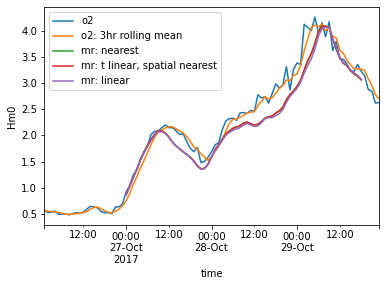

time: 1.16 s (started: 2021-06-08 15:16:51 +02:00)


In [10]:
plt.figure()
ax = plt.gca()
o2.df['Hm0'].plot(ax=ax, label='o2')
o2.df['Hm0'].rolling('3H').mean().plot(ax=ax, label='o2: 3hr rolling mean') # phase shift not fixed
mr1['swh'].plot(ax=ax, label='mr: nearest')
mr2['swh'].plot(ax=ax, label='mr: t linear, spatial nearest')
mr3['swh'].plot(ax=ax, label='mr: linear')
plt.ylabel('Hm0')
plt.legend()

No difference betwen green and red here, as o2 is on same time vector as model

### Extract TrackObservation o3

See http://xarray.pydata.org/en/stable/user-guide/interpolation.html#advanced-interpolation

Specify track coordinates as DataArray with new dimension name

In [11]:
t = xr.DataArray(o3.df.index, dims="track")
x = xr.DataArray(o3.df.Longitude, dims="track")
y = xr.DataArray(o3.df.Latitude, dims="track")

time: 0 ns (started: 2021-06-08 15:16:52 +02:00)


Interpolate to track

In [12]:
da = ds['swh'].interp(coords=dict(time=t, longitude=x, latitude=y), method="nearest")
mr1 = da.to_dataframe()

time: 47 ms (started: 2021-06-08 15:16:52 +02:00)


In [13]:
da = ds['swh'].interp(time=t, method="linear")
da = da.interp(coords=dict(longitude=x, latitude=y), method="nearest")
mr2 = da.to_dataframe()

time: 31 ms (started: 2021-06-08 15:16:52 +02:00)


In [14]:
da = ds['swh'].interp(coords=dict(time=t, longitude=x, latitude=y), method="linear")
mr3 = da.to_dataframe()

time: 15 ms (started: 2021-06-08 15:16:52 +02:00)


Nearest time, linear spatial

In [15]:
da = ds['swh'].interp(time=t, method="nearest")
da = da.interp(coords=dict(longitude=x, latitude=y), method="linear")
mr4 = da.to_dataframe()

time: 31 ms (started: 2021-06-08 15:16:52 +02:00)


Time series comparisons

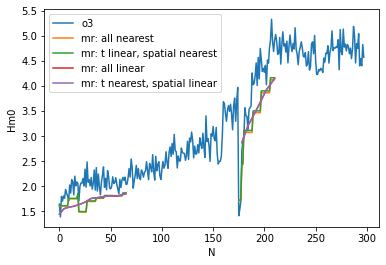

time: 1.36 s (started: 2021-06-08 15:16:52 +02:00)


In [16]:
plt.figure()
ax = plt.gca()
o3.df.reset_index()['swh'].plot(ax=ax, label='o3')
mr1.reset_index()['swh'].plot(ax=ax, label='mr: all nearest')
mr2.reset_index()['swh'].plot(ax=ax, label='mr: t linear, spatial nearest')
mr3.reset_index()['swh'].plot(ax=ax, label='mr: all linear')
mr3.reset_index()['swh'].plot(ax=ax, label='mr: t nearest, spatial linear')
plt.ylabel('Hm0')
plt.xlabel('N')
plt.legend()

The xarray interpolation returns nan for query coordinates outside the original coordinates:

In [17]:
mr1b = mr1.dropna()
mr2b = mr2.dropna()
mr3b = mr3.dropna()

time: 15 ms (started: 2021-06-08 15:16:54 +02:00)


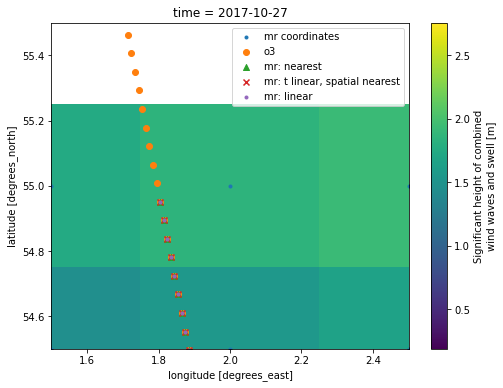

time: 1.7 s (started: 2021-06-08 15:16:54 +02:00)


In [18]:
plt.figure(figsize=[8,6])
ds.isel(time=0)['swh'].plot()
x, y = np.meshgrid(ds['longitude'], ds['latitude'])
plt.scatter(x, y, marker='.', label='mr coordinates')
plt.scatter(o3.df.Longitude, o3.df.Latitude, label='o3') # ToDo: also convention for x, y for TrackObservation?
plt.scatter(mr1b.longitude, mr1b.latitude, marker='^', label='mr: nearest')
plt.scatter(mr2b.longitude, mr1b.latitude, marker='x', label='mr: t linear, spatial nearest')
plt.scatter(mr2b.longitude, mr1b.latitude, marker='.', label='mr: linear')
plt.xlim([1.5,2.5])
plt.ylim([54.5,55.5])
plt.legend()

## Coordinate ranges

In the example above observations and model result have x coordinates on (-180,180). Problems start if this is not the case:

Point observation at (-1,50) vs (359,50)

In [19]:
ds['swh'].interp(coords=dict(longitude=-1, latitude=50), method="nearest").to_dataframe().dropna().count()

longitude    67
latitude     67
swh          67
dtype: int64

time: 16 ms (started: 2021-06-08 15:16:55 +02:00)


In [20]:
ds['swh'].interp(coords=dict(longitude=359, latitude=50), method="nearest").to_dataframe().dropna().count()

longitude    0
latitude     0
swh          0
dtype: int64

time: 16 ms (started: 2021-06-08 15:16:56 +02:00)


ToDo:
- should the ModelResult govern the x coordinate range and the observation x coordinates are adjusted before extraction?

## Extrapolation / tolerance at domain boundary

ToDo

## Concatinated xarray data set

ToDo

## Global dataset

ToDo


Run download.ipynb first.

Load the global 2017 ERA5 netcdf file

In [21]:
#ds2 = xr.open_dataset(r"..\tests\testdata\SW\ERA5_DutchCoast.nc")

time: 0 ns (started: 2021-06-08 15:16:56 +02:00)


## TODO:
- performance improvement for assume_sorted?
- behaviour circular data and croosing of cyclic boundaries (0,360 vs -180,180)
- theoretical case, but how are poles handled?
- check iterp_like for model vs model?